Import libraries

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

1. Convexity Defects

[[[    1   260   134 16003]]

 [[  262   520   388 15828]]

 [[  524   782   656 15920]]

 [[  784  1042   910 15920]]]
(177, 193)
(177, 282)
(258, 282)
(258, 192)


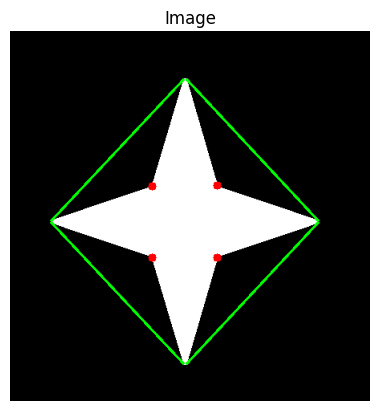

In [14]:

img = cv.imread('../../images/star2.png')
assert img is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret,thresh = cv.threshold(img_gray, 127, 255,0)
contours,hierarchy = cv.findContours(thresh,2,1)
cnt = contours[0]
hull = cv.convexHull(cnt,returnPoints = False)
defects = cv.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
 s,e,f,d = defects[i,0]
 start = tuple(cnt[s][0])
 end = tuple(cnt[e][0])
 far = tuple(cnt[f][0])
 cv.line(img,start,end,[0,255,0],2)
 cv.circle(img,far,5,[0,0,255],-1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.title('Image'), plt.axis('off')
plt.show()

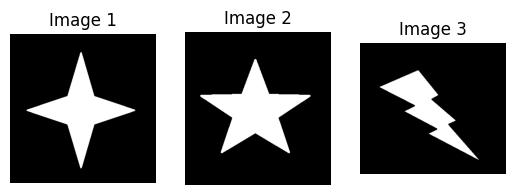

Matching Image 1 with itself = 0.0
Matching Image 1 with Image 2 = 0.13781586322009282
Matching Image 1 with Image 3 = 1.34789281640867


In [21]:
img1 = cv.imread('../../images/star2.png', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('../../images/star3.png', cv.IMREAD_GRAYSCALE)
img3 = cv.imread('../../images/lightning.png',cv.IMREAD_GRAYSCALE)

assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"
assert img3 is not None, "file could not be read, check with os.path.exists()"

ret, thresh = cv.threshold(img1, 127, 255,0)
ret, thresh2 = cv.threshold(img2, 127, 255,0)
ret, thresh3 = cv.threshold(img3, 127, 255,0)

contours,hierarchy = cv.findContours(thresh,2,1)
cnt1 = contours[0]
contours,hierarchy = cv.findContours(thresh2,2,1)
cnt2 = contours[0]
contours, hierarchy = cv.findContours(thresh3,2,1)
cnt3 = contours[0]
rate = cv.matchShapes(cnt1,cnt1,1,0.0)
rate1 = cv.matchShapes(cnt1,cnt2,1,0.0)
rate2 = cv.matchShapes(cnt1,cnt3,1,0.0)

plt.subplot(131), plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title('Image 1'), plt.axis('off')
plt.subplot(132), plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title('Image 2'), plt.axis('off')

plt.subplot(133), plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
plt.title('Image 3'), plt.axis('off')
plt.show()
print('Matching Image 1 with itself =',rate)
print('Matching Image 1 with Image 2 =',rate1 )
print('Matching Image 1 with Image 3 =', rate2 )